In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [14]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2019-08-10 15:33:46--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.26.16, 2404:6800:4004:801::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.26.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-08-10 15:33:47 (135 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [15]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [16]:
history = model.fit(predictors, label, epochs=100, verbose=1)

W0810 15:34:47.374361 140583698241408 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.8955 - acc: 0.0230
Epoch 2/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 6.4997 - acc: 0.0217
Epoch 3/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 6.3639 - acc: 0.0274
Epoch 4/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 6.2607 - acc: 0.0288
Epoch 5/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 6.1828 - acc: 0.0356
Epoch 6/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 6.1107 - acc: 0.0394
Epoch 7/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 6.0309 - acc: 0.0407
Epoch 8/100
15462/15462 [==============================] - 24s 2ms/sample - loss: 5.9443 - acc: 0.0440
Epoch 9/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 5.8452 - acc: 0.0507
Epoch 10/100
15462/15462 [==============================] - 25s 2ms/sampl

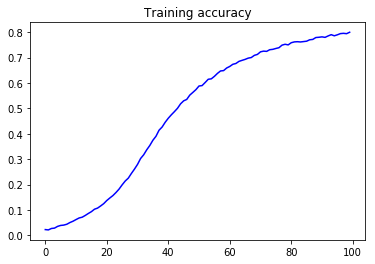

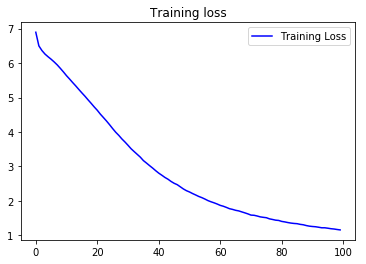

In [17]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [20]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope another life things kind bright bright ' bright ' live bright young days forth done thee you still be young me still bright look so kind live young me bright bad young me bright still live bright true glory bright thee find sort groan bright good ' say me bright true ' twain ' bright told you forsaken commend bad room last dead kind toil'd quite wrong than depend scope clears light quite sit sit sit gone lived dead express'd rare glory dead respect shown shown shown remain behind rolling date shade hate lives bed another cross cross ' to
